In [23]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import read_csv

# set the path to the data files
path1 = 'OECD_GDP.csv'
path2 = 'OECD_Trade.csv'

# read the data files into pandas dataframes
gdp = read_csv(path1)
trade = read_csv(path2)



### Cleaning GDP Dataframe

In [24]:
gdp.head()

,LOCATION,Country,TRANSACT,Transaction,MEASURE,Measure,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2010,2010,USD,US Dollar,6,Millions,NaN,NaN,1.299463e+06,NaN,NaN
1,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2011,2011,USD,US Dollar,6,Millions,NaN,NaN,1.546689e+06,NaN,NaN
2,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2012,2012,USD,US Dollar,6,Millions,NaN,NaN,1.590708e+06,NaN,NaN
3,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2013,2013,USD,US Dollar,6,Millions,NaN,NaN,1.543216e+06,NaN,NaN
4,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2014,2014,USD,US Dollar,6,Millions,NaN,NaN,1.464256e+06,NaN,NaN


In [25]:
gdp.columns

Index(['LOCATION', 'Country', 'TRANSACT', 'Transaction', 'MEASURE', 'Measure',
       'TIME', 'Year', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [26]:
# Drop unnecessary columns from the gdp dataframe
gdp = gdp.drop(columns=['TRANSACT', 'Transaction', 'MEASURE', 'Measure', 'Year', 'Unit Code', 'Unit', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'])

In [27]:
# Multiply the GDP values by 1,000,000 to convert to real GDP values
gdp['Value'] = gdp['Value']*1000000

In [28]:
# Drop PowerCode Code and PowerCode columns from the GDP dataframe
gdp = gdp.drop(columns=['PowerCode Code', 'PowerCode'])

In [29]:
# Rename remaining columns in the GDP dataframe to more meaningful names
gdp.columns = ['CountryCode', 'Country', 'Year', 'GDP']

In [30]:
# Drop European Union from the GDP dataframe to avoid double counting
gdp = gdp[gdp['Country'] != 'European Union (28 countries)']

In [31]:
# checking
print(gdp.shape)
gdp

(336, 4)


,CountryCode,Country,Year,GDP
0,AUS,Australia,2010,1.299463e+12
1,AUS,Australia,2011,1.546689e+12
2,AUS,Australia,2012,1.590708e+12
3,AUS,Australia,2013,1.543216e+12
4,AUS,Australia,2014,1.464256e+12
...,...,...,...,...
340,BRA,Brazil,2012,2.465228e+12
341,BRA,Brazil,2013,2.472819e+12
342,BRA,Brazil,2014,2.456044e+12
343,BRA,Brazil,2015,1.802212e+12


### Cleaning TRADE Dataframe

In [32]:
trade.head()

,LOCATION,Reporter country,FLOW,Flow,PARTNER,Partner country,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2011,2011,USD,US Dollar,0,Units,NaN,NaN,73144918,NaN,NaN
1,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2012,2012,USD,US Dollar,0,Units,NaN,NaN,71483059,NaN,NaN
2,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2013,2013,USD,US Dollar,0,Units,NaN,NaN,67897422,NaN,NaN
3,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2014,2014,USD,US Dollar,0,Units,NaN,NaN,61114752,NaN,NaN
4,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2015,2015,USD,US Dollar,0,Units,NaN,NaN,54730242,NaN,NaN


In [33]:
trade.columns

Index(['LOCATION', 'Reporter country', 'FLOW', 'Flow', 'PARTNER',
       'Partner country', 'FREQUENCY', 'Frequency', 'TIME', 'Time',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [34]:
# Drop unnecessary columns from the trade Dataframe
trade = trade.drop(columns=['Flow', 'FREQUENCY', 'Frequency', 'TIME', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'])

In [35]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29222 entries, 0 to 29221
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LOCATION          29222 non-null  object
 1   Reporter country  29222 non-null  object
 2   FLOW              29222 non-null  object
 3   PARTNER           29222 non-null  object
 4   Partner country   29222 non-null  object
 5   Time              29222 non-null  int64 
 6   Value             29222 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.6+ MB


In [36]:
trade['LOCATION'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'CHL', 'EST', 'ISR', 'SVN', 'LTU', 'LVA',
       'EU28'], dtype=object)

In [37]:
# Drop European Union from the trade dataframe to avoid double counting
trade = trade[trade['LOCATION'] != 'EU28']

In [38]:
# Renaming the columns in the trade dataframe to more meaningful names
trade.columns = ['CountryCode', 'Country', 'TradeType', 'PartnerCountryCode', 'PartnerCountry', 'Year', 'TradeValue']

In [39]:
trade['PartnerCountry'].unique()

array(['Austria', 'Belgium', 'Canada', 'Czech Republic', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States', 'Argentina', 'Brazil', 'Chile',
       "China (People's Republic of)", 'Estonia', 'India', 'Indonesia',
       'Israel', 'Russia', 'Saudi Arabia', 'Slovenia', 'South Africa',
       'Australia', 'OECD - Total', 'G20', 'Latvia', 'Lithuania',
       'Costa Rica', 'Colombia'], dtype=object)

In [40]:
# Remove 'OECD - Total' row and 'G20' row from the trade dataframe to avoid double counting
trade = trade[trade['PartnerCountry'] != 'OECD - Total']
trade = trade[trade['PartnerCountry'] != 'G20']

In [41]:
# checking
print(trade.shape)
print(trade.dtypes)
trade

(27728, 7)
CountryCode           object
Country               object
TradeType             object
PartnerCountryCode    object
PartnerCountry        object
Year                   int64
TradeValue             int64
dtype: object


,CountryCode,Country,TradeType,PartnerCountryCode,PartnerCountry,Year,TradeValue
0,AUS,Australia,EXP,AUT,Austria,2011,73144918
1,AUS,Australia,EXP,AUT,Austria,2012,71483059
2,AUS,Australia,EXP,AUT,Austria,2013,67897422
3,AUS,Australia,EXP,AUT,Austria,2014,61114752
4,AUS,Australia,EXP,AUT,Austria,2015,54730242
...,...,...,...,...,...,...,...
28847,IRL,Ireland,IMP,IRL,Ireland,2016,194655059
28848,NZL,New Zealand,EXP,LUX,Luxembourg,2017,1566796
28849,EST,Estonia,EXP,CRI,Costa Rica,2017,252962
28850,EST,Estonia,EXP,CRI,Costa Rica,2018,240915


# Task 3

#### Create a colormap with different colors
##### Use this instead of existing colormaps because some sequential/gradient colormaps (e.g., hsv, YlOrRd, etc.)  make it difficult to differentiate the area, while qualitative ones (e.g., tab20, tab10, etc.) don't have enough colors for all countries

In [42]:
import matplotlib.colors as mcolors

# Get a list of all color names in Python\
color_names = list(mcolors.CSS4_COLORS.keys())
print(color_names)

['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 

In [43]:
from matplotlib.colors import ListedColormap

# Create a list from color names bove
distinct_colors = ['aqua', 'azure', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgrey', 'indigo', 'lavenderblush', 'lemonchiffon', 'teal', 'thistle', 'tomato','orange', 'orangered', 'orchid', 'palegoldenrod', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown']

# Create a colormap from the list of colors
custom_colormap = ListedColormap(distinct_colors)

## Part 1. Total Annual Exports

In [44]:
# Make a copy of trade data filtering for exports data only
country_exports = trade[trade['TradeType'] == 'EXP'].copy()

# Convert value into per trillion USD (for better visibility when graphing)
country_exports['TradeValue'] = country_exports['TradeValue'] / 1_000_000_000_000

# Sum up each country exports for each year
country_exports = country_exports.groupby(['Country', 'Year'])['TradeValue'].sum()

# Unstack the dataframe to have year as the rows and each country as a column
# Fill in 0 for empty/missing data
country_exports = country_exports.unstack(level='Country').fillna(0)
country_exports

Country,Australia,Austria,Belgium,Canada,Chile,Czech Republic,Denmark,Estonia,Finland,France,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Year,,,,,,,,,,,,,,,,,,,,,
2010,0.000000,0.131927,0.375036,0.368100,0.061601,0.123391,0.085276,0.010603,0.058424,0.430204,...,0.140967,0.041581,0.061372,0.019127,0.207237,0.140031,0.170105,0.069500,0.338888,1.032331
2011,0.198604,0.155470,0.435607,0.429205,0.070638,0.151464,0.100818,0.015110,0.066015,0.497171,...,0.170307,0.049899,0.073906,0.022716,0.245393,0.160852,0.201658,0.082319,0.410198,1.195084
2012,0.186369,0.145532,0.405420,0.432074,0.067715,0.145132,0.095428,0.014660,0.060702,0.470297,...,0.160579,0.047463,0.075930,0.020949,0.231710,0.152365,0.193257,0.083572,0.380659,1.249956
2013,0.182207,0.153113,0.420562,0.433446,0.066118,0.148659,0.098954,0.015343,0.063752,0.477906,...,0.176083,0.050995,0.080163,0.022784,0.246840,0.149305,0.195436,0.086834,0.432912,1.269933
2014,0.173680,0.040708,0.420813,0.451376,0.064517,0.160450,0.090030,0.016507,0.065645,0.478316,...,0.191410,0.052293,0.080071,0.024280,0.260538,0.146585,0.205067,0.092589,0.438197,1.310486
2015,0.130161,0.134094,0.361528,0.422138,0.053278,0.145658,0.075428,0.013089,0.053093,0.416730,...,0.174449,0.046933,0.069812,0.020803,0.233631,0.125670,0.231193,0.088419,0.399583,1.228295
2016,0.131365,0.134143,0.356208,0.372778,0.053026,0.151040,0.075154,0.012698,0.051167,0.416212,...,0.175249,0.048036,0.072269,0.024316,0.237353,0.125925,0.255760,0.087852,0.350418,1.190416
2017,0.159232,0.000000,0.388296,0.403712,0.060061,0.000000,0.077903,0.014096,0.059394,0.443440,...,0.199926,0.053783,0.077597,0.024947,0.262696,0.138454,0.250996,0.094861,0.374292,1.271982
2018,0.188721,0.000000,0.422469,0.430343,0.066924,0.186367,0.081503,0.016142,0.065996,0.424284,...,0.237305,0.059846,0.087469,0.028591,0.000000,0.150657,0.260556,0.107347,0.417784,1.366774


#### 1. Stacked area chart - Total Annual exports for each country for each year from 2010 to 2018

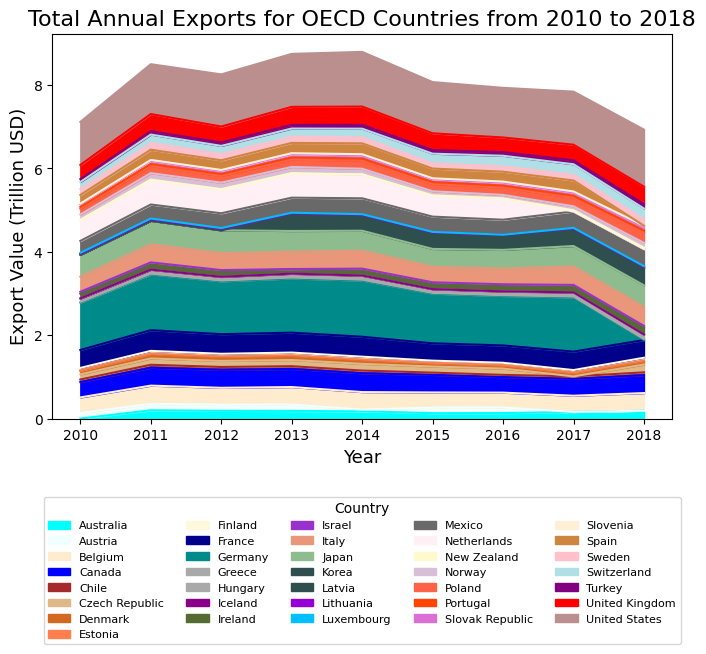

In [45]:
# Create subplot & adjust sizes
fig_1_ex, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_exports.plot(kind='area', stacked=True, ax=ax, colormap=custom_colormap)

# Add titles, labels, legends and adjust fontsize
ax.set_title('Total Annual Exports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Export Value (Trillion USD)', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor= (0.5, -0.6),loc='lower center', ncol=5)

# Set x-axis label horizontally & set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart & include legend in the in the plotting area (after using bbox_on_anchor)
fig_1_ex.savefig("exports-stacked-area-chart.png", bbox_inches='tight')

#### 2. Stacked bar chart - Total Annual exports for each country for each year from 2010 to 2018

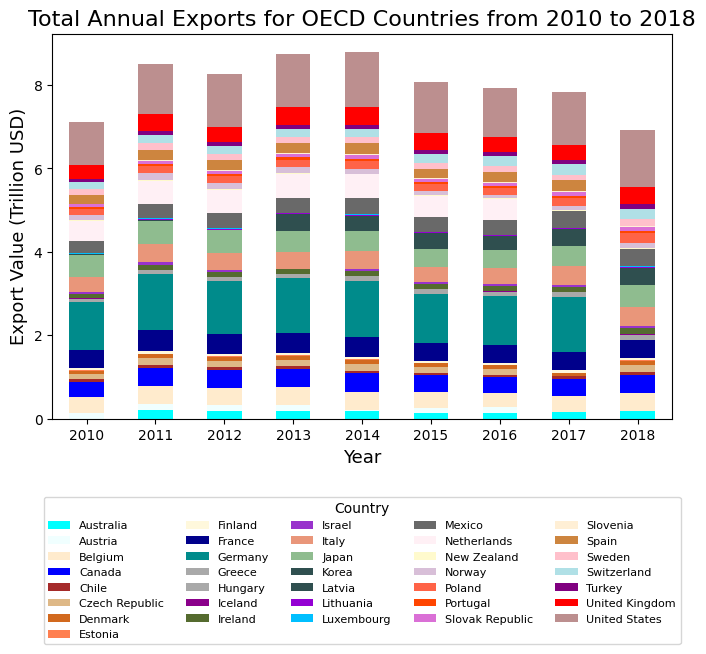

In [46]:
# Create subplot & adjust sizes
fig_2_ex, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_exports.plot(kind='bar', stacked=True, ax=ax, colormap=custom_colormap)

# Add titles, labels, legends and adjust fontsize
ax.set_title('Total Annual Exports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Export Value (Trillion USD)', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor=(0.5, -0.6), loc='lower center', ncol=5)

# Set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart
fig_2_ex.savefig("exports-stacked-bar-chart.png", bbox_inches='tight')

#### 3. Normalized stacked bar chart - Total Annual exports for each country for each year from 2010 to 2018

In [47]:
# Create a copy of the exports data
country_exports_norm = country_exports.copy()

# Add a column 'TOTAL' to sum all country imports by year
country_exports_norm['TOTAL'] = country_exports_norm.sum(axis=1)

# Loop through data to return the % imports of each country/total imports of all country each year
for country in country_exports_norm:
     country_exports_norm[country] = (country_exports_norm[country] / country_exports_norm['TOTAL']) * 100

# Remove column 'TOTAL'
country_exports_norm.drop('TOTAL', axis=1, inplace=True)

country_exports_norm

Country,Australia,Austria,Belgium,Canada,Chile,Czech Republic,Denmark,Estonia,Finland,France,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Year,,,,,,,,,,,,,,,,,,,,,
2010,0.000000,1.854784,5.272710,5.175197,0.866064,1.734788,1.198919,0.149071,0.821392,6.048339,...,1.981882,0.584590,0.862836,0.268908,2.913593,1.968728,2.391538,0.977112,4.764499,14.513770
2011,2.337322,1.829691,5.126547,5.051202,0.831315,1.782544,1.186505,0.177829,0.776916,5.851076,...,2.004296,0.587248,0.869779,0.267337,2.887961,1.893019,2.373256,0.968796,4.827511,14.064636
2012,2.258363,1.763514,4.912760,5.235743,0.820549,1.758668,1.156364,0.177647,0.735572,5.698924,...,1.945851,0.575145,0.920096,0.253859,2.807792,1.846309,2.341833,1.012698,4.612716,15.146595
2013,2.083752,1.751024,4.809609,4.956958,0.756141,1.700090,1.131650,0.175470,0.729083,5.465404,...,2.013708,0.583191,0.916760,0.260561,2.822901,1.707471,2.235039,0.993043,4.950845,14.523157
2014,1.975429,0.463006,4.786302,5.133924,0.733816,1.824943,1.023993,0.187752,0.746643,5.440339,...,2.177089,0.594781,0.910719,0.276164,2.963342,1.667251,2.332422,1.053097,4.984026,14.905384
2015,1.613311,1.662062,4.481044,5.232287,0.660368,1.805391,0.934903,0.162236,0.658079,5.165246,...,2.162251,0.581726,0.865301,0.257844,2.895797,1.557646,2.865571,1.095935,4.952715,15.224367
2016,1.656528,1.691559,4.491820,4.700773,0.668669,1.904630,0.947701,0.160123,0.645225,5.248484,...,2.209917,0.605739,0.911319,0.306630,2.993050,1.587931,3.225165,1.107821,4.418811,15.011296
2017,2.031271,0.000000,4.953350,5.150016,0.766179,0.000000,0.993779,0.179813,0.757670,5.656807,...,2.550392,0.686094,0.989881,0.318238,3.351117,1.766207,3.201866,1.210114,4.774711,16.226227
2018,2.724210,0.000000,6.098382,6.212035,0.966059,2.690222,1.176499,0.233010,0.952660,6.124579,...,3.425512,0.863875,1.262622,0.412717,0.000000,2.174746,3.761145,1.549565,6.030748,19.729509


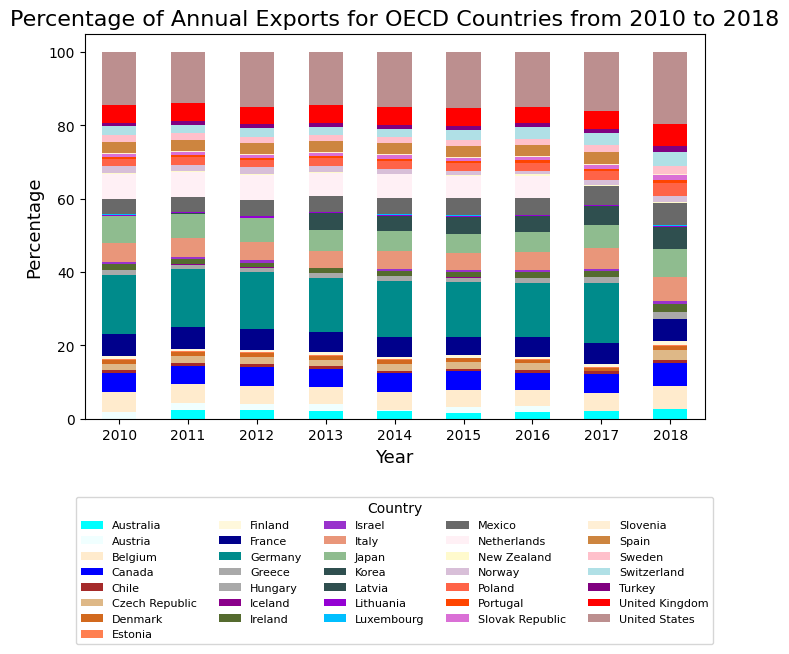

In [48]:
# Create subplot & adjust sizes
fig_3_ex, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_exports_norm.plot(kind='bar', stacked=True, ax=ax, colormap=custom_colormap)

# Add titles, labels, legends and adjust fontsize
ax.set_title('Percentage of Annual Exports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Percentage', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor=(0.5, -0.6), loc='lower center', ncol=5)

# Set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart
fig_3_ex.savefig("exports-norm-stacked-bar-chart.png", bbox_inches='tight')

## Part 2: Total Annual Imports

In [49]:
# Make a copy of trade data filtering for exports data only
country_imports = trade[trade['TradeType'] == 'IMP'].copy()

# Convert value into per trillion USD (for better visibility when graphing)
country_imports['TradeValue'] = country_imports['TradeValue'] / 1_000_000_000_000

# Sum up each country exports for each year
country_imports = country_imports.groupby(['Country', 'Year'])['TradeValue'].sum()

# Unstack the dataframe to have year as the rows and each country as a column
# Fill in 0 for empty/missing data
country_imports = country_imports.unstack(level='Country').fillna(0)
country_imports

Country,Australia,Austria,Belgium,Canada,Chile,Czech Republic,Denmark,Estonia,Finland,France,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Year,,,,,,,,,,,,,,,,,,,,,
2010,0.000000,0.141888,0.362912,0.355205,0.050216,0.115021,0.079373,0.011746,0.063039,0.540535,...,0.162631,0.069193,0.053623,0.022007,0.261019,0.141739,0.162271,0.143754,0.479056,1.634712
2011,0.171560,0.167233,0.431074,0.402247,0.062680,0.137618,0.092438,0.016831,0.076558,0.629338,...,0.192419,0.073074,0.072643,0.025902,0.295398,0.166577,0.191408,0.183668,0.562718,1.874568
2012,0.185851,0.155390,0.401265,0.410857,0.067686,0.127761,0.088348,0.016854,0.068297,0.595014,...,0.176002,0.061577,0.061505,0.023459,0.257771,0.153795,0.183746,0.176776,0.581713,1.967852
2013,0.172724,0.160252,0.411945,0.419857,0.067261,0.128593,0.091473,0.017370,0.069480,0.603791,...,0.185345,0.064082,0.067329,0.024593,0.260223,0.149536,0.183977,0.189267,0.534909,1.989483
2014,0.171319,0.027773,0.411314,0.429350,0.060796,0.135941,0.091870,0.017968,0.069747,0.574564,...,0.196182,0.065621,0.064937,0.025537,0.289210,0.152399,0.185456,0.183127,0.619378,2.074840
2015,0.158472,0.139233,0.338302,0.423150,0.053694,0.125091,0.079381,0.014224,0.055104,0.486898,...,0.170422,0.059600,0.059301,0.021845,0.260185,0.130400,0.220258,0.160907,0.572446,2.004414
2016,0.151843,0.140564,0.326041,0.374175,0.051518,0.127930,0.078601,0.013962,0.055709,0.484992,...,0.169181,0.062189,0.060832,0.024600,0.254510,0.133051,0.207845,0.155350,0.577689,1.945720
2017,0.170652,0.000000,0.366974,0.403215,0.056267,0.000000,0.085430,0.015565,0.064542,0.531346,...,0.197165,0.071277,0.065494,0.026451,0.284216,0.144574,0.214998,0.176358,0.578193,2.075663
2018,0.178747,0.000000,0.411890,0.429187,0.064731,0.164190,0.093655,0.017167,0.071991,0.534176,...,0.239745,0.079641,0.072959,0.030712,0.000000,0.159180,0.233019,0.168722,0.606500,2.254076


#### 1. Stacked area chart - Total Annual imports for each country for each year from 2010 to 2018

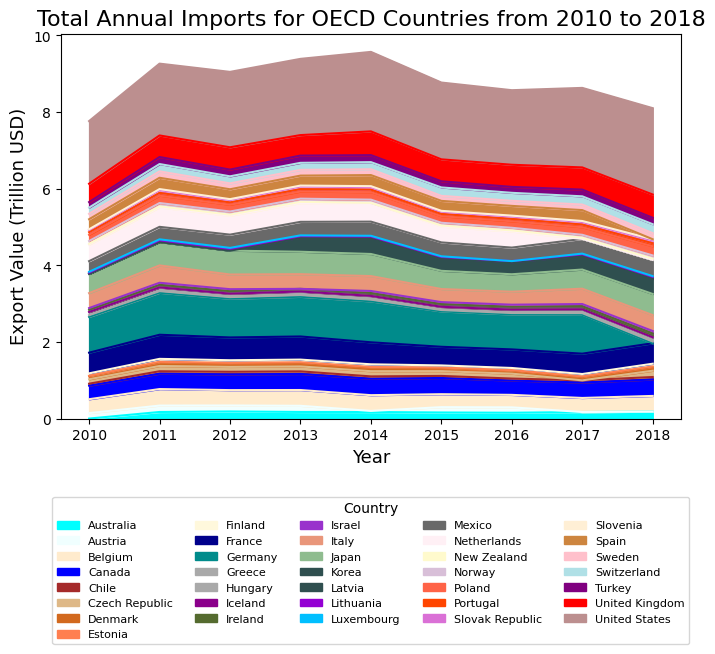

In [50]:
# Create subplot & adjust sizes
fig_1_im, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_imports.plot(kind='area', stacked=True, ax=ax, colormap=custom_colormap)

# Add titles, labels, legends and adjust fontsize
ax.set_title('Total Annual Imports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Export Value (Trillion USD)', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor=(0.5, -0.6), loc='lower center', ncol=5)

# Set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart
fig_1_im.savefig("imports-stacked-area-chart.png", bbox_inches='tight')

#### 2. Stacked bar chart - Total Annual imports for each country for each year from 2010 to 2018

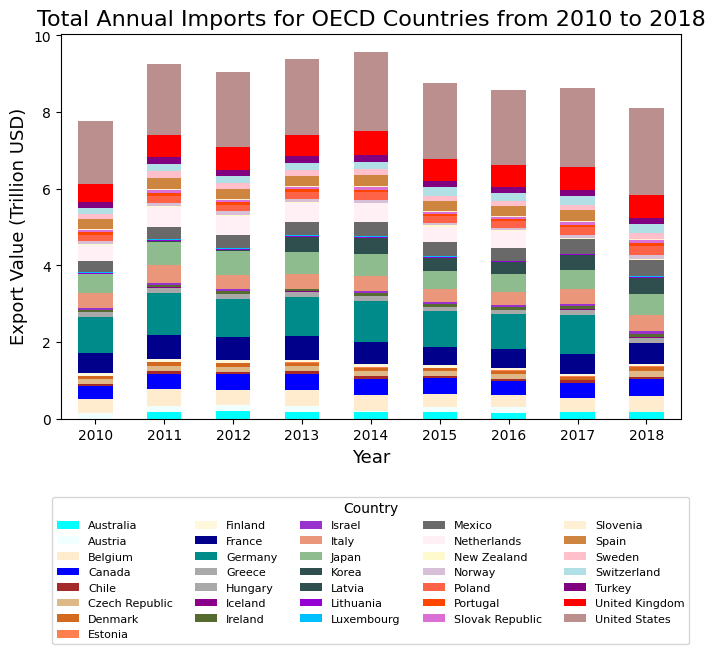

In [51]:
# Create subplot & adjust sizes
fig_2_im, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_imports.plot(kind='bar', stacked=True, ax=ax, colormap=custom_colormap)

# Add titles, labels, legends and adjust fontsize
ax.set_title('Total Annual Imports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Export Value (Trillion USD)', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor=(0.5, -0.6), loc='lower center', ncol=5)

# Set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart
fig_2_im.savefig("imports-stacked-bar-chart.png", bbox_inches='tight')

#### 3. Normalized stacked bar chart - Total Annual imports for each country for each year from 2010 to 2018

In [52]:
# Create a copy of the imports data
country_imports_norm = country_imports.copy()

# Add a column 'TOTAL' to sum all country imports by year
country_imports_norm['TOTAL'] = country_imports_norm.sum(axis=1)

# Loop through data to return the % imports of each country/total imports of all country each year
for country in country_imports_norm:
     country_imports_norm[country] = (country_imports_norm[country] / country_imports_norm['TOTAL']) * 100

# Remove column 'TOTAL'
country_imports_norm.drop('TOTAL', axis=1, inplace=True)

country_imports_norm

Country,Australia,Austria,Belgium,Canada,Chile,Czech Republic,Denmark,Estonia,Finland,France,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Year,,,,,,,,,,,,,,,,,,,,,
2010,0.000000,1.827480,4.674206,4.574949,0.646765,1.481438,1.022298,0.151288,0.811925,6.961949,...,2.094644,0.891191,0.690649,0.283443,3.361848,1.825560,2.090001,1.851519,6.170109,21.054652
2011,1.851888,1.805178,4.653175,4.342012,0.676588,1.485506,0.997813,0.181679,0.826392,6.793320,...,2.077045,0.788787,0.784140,0.279595,3.188644,1.798091,2.066129,1.982584,6.074198,20.234803
2012,2.053904,1.717269,4.434524,4.540525,0.748020,1.411927,0.976365,0.186263,0.754770,6.575702,...,1.945064,0.680514,0.679714,0.259255,2.848714,1.699641,2.030646,1.953614,6.428711,21.747419
2013,1.839753,1.706904,4.387786,4.472066,0.716419,1.369697,0.974317,0.185017,0.740061,6.431222,...,1.974182,0.682567,0.717149,0.261955,2.771738,1.592769,1.959610,2.015957,5.697530,21.190770
2014,1.790074,0.290189,4.297734,4.486184,0.635246,1.420420,0.959934,0.187748,0.728769,6.003495,...,2.049865,0.685663,0.678507,0.266828,3.021887,1.592385,1.937788,1.913453,6.471747,21.679548
2015,1.806896,1.587528,3.857318,4.824755,0.612224,1.426288,0.905100,0.162176,0.628290,5.551605,...,1.943149,0.679562,0.676152,0.249080,2.966626,1.486824,2.511384,1.834664,6.527024,22.854310
2016,1.771647,1.640046,3.804114,4.365716,0.601086,1.492632,0.917079,0.162899,0.649990,5.658687,...,1.973933,0.725600,0.709758,0.287021,2.969517,1.552384,2.425052,1.812562,6.740233,22.701861
2017,1.977256,0.000000,4.251948,4.671848,0.651938,0.000000,0.989836,0.180343,0.747814,6.156441,...,2.284450,0.825855,0.758844,0.306475,3.293071,1.675112,2.491079,2.043375,6.699238,24.049684
2018,2.206311,0.000000,5.084059,5.297553,0.798990,2.026641,1.156010,0.211894,0.888598,6.593464,...,2.959229,0.983023,0.900545,0.379084,0.000000,1.964794,2.876204,2.082576,7.486176,27.822584


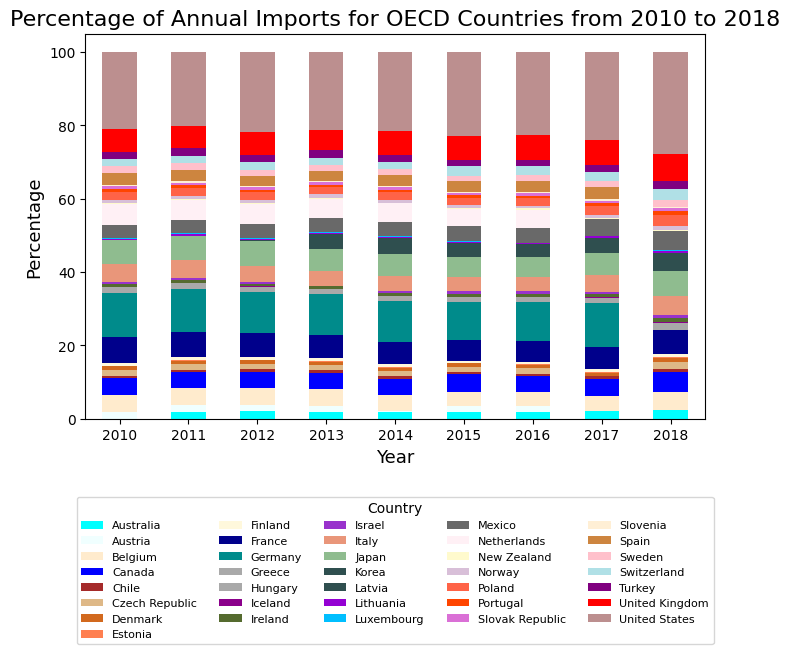

In [53]:
# Create subplot & adjust sizes
fig_3_im, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_imports_norm.plot(kind='bar', stacked=True, ax=ax, colormap=custom_colormap)

# Add titles, labels, legends and adjust fontsize
ax.set_title('Percentage of Annual Imports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Percentage', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor=(0.5, -0.6), loc='lower center', ncol=5)

# Set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart
fig_3_im.savefig("imports-norm-stacked-bar-chart.png", bbox_inches='tight')